# Preliminary Imports

In [3]:
import pandas as pd
import numpy as np
from random import randrange
from functools import reduce
from tail_recursive import tail_recursive

# Part 1: Think About The Data (Chris)

## Part 1.1

Our dataset offers childcare prices from the year 2008 to 2018 by childcare provider type, age of children, and county characteristics. This data set is of particular interest to us because it provides meaningful insight into how childcare costs have changed over the years and how it was affected by changing governing bodies in the United States. Based on such interpretation, the data set can be an effective tool for present and future parents and policymakers when making a decision that will impact childcare prices.

## Part 1.2

There are a total of 62 numerical attributes and 3 categorical attributes in the data set.

## Part 1.3

There are missing values in our data set, often for specific age groups or entire counties. 

(Complete tomorrow during the meeting (9/26))


## Part 1.4

We believe that the “unemployment rate of the population aged 20 to 64 years old”, “median household income expressed in 2018 dollars” and “county identifier”will be the most descriptive of the data. This is because we believe that the subgroup of relatively high median household income and low unemployment rate will inevitably be able to afford high-quality childcare, thus leading to purchasing higher-priced childcare. Similarly, subgroups of relatively low median household income and high unemployment rate will lead to lower-priced childcare. For county identifier, we believe that as different states have different policies regarding childcare, this will inevitably lead to subgroups of states / counties with similar policies.

## Part 1.5

We believe that there will be clusters in the data because some of the attributes, like those mentioned in the previous section, are heavy influences of childcare prices, thus we expect there to be clusters of similar groups of those attributes (i.e., unemployment rate).

## Part 1.6

By finding clusters in the data, we can gain an understanding of the influential attributes that have led to the clusters. This is massively help parents and policymakers to understand how their decisions might affect childcare prices. Furthermore, with new instances, we can have a better understanding of which cluster it will fall into. 

## Part 1.7

(NO IDEA)

## Part 1.8

This will depend on what type of clustering algorithm we implement. However, in general, we do not expect that the clusters will be of similar size. This is because our dataset contains a large number of numerical attributes. Furthermore, taking the example of county identifier as an example, the number of states / counties that share similar childcare policies will not be evenly distributed, thus leading to clusters of different sizes.

In [9]:
df = pd.read_csv("childcare_costs.csv")
#df.index.to_series().map(lambda i: df.iloc[i].isna().sum() / len(df.iloc[i])).to_csv("nancount.csv")

In [10]:
df.describe()

,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,memp_p,femp_p,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
count,34567.000000,34567.000000,34567.000000,34567.00000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,...,34567.000000,34567.000000,23593.000000,23383.000000,23593.000000,23593.000000,23593.000000,23383.000000,23383.000000,23383.000000
mean,30388.132786,2012.999711,7.465902,7.02902,7.860291,6.900073,6.482007,7.275457,70.086125,68.821409,...,23.456238,7.634403,101.234253,92.523582,146.051770,130.482768,122.232852,113.421657,106.759749,104.189510
std,15161.015383,3.162232,3.538619,3.56342,4.037657,3.446199,3.477956,3.990758,7.696499,11.758088,...,7.956927,4.501044,34.552888,27.669904,53.698566,43.775370,38.538323,32.819372,29.982431,28.961701
min,1001.000000,2008.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,33.600000,0.000000,...,0.000000,0.000000,18.980000,22.000000,27.730000,21.540000,21.540000,43.080000,43.080000,40.030000
25%,18177.000000,2010.000000,5.100000,4.64000,5.200000,4.600000,4.200000,4.700000,65.100000,62.600000,...,17.610000,4.410000,78.650000,75.000000,108.750000,100.000000,95.880000,90.000000,85.085000,84.255000
50%,29177.000000,2013.000000,7.050000,6.59000,7.390000,6.500000,6.000000,6.800000,70.600000,69.600000,...,23.400000,6.630000,96.530000,88.180000,134.500000,120.990000,113.990000,106.000000,100.250000,99.650000
75%,45081.000000,2016.000000,9.350000,8.88000,9.920000,8.700000,8.250000,9.200000,75.500000,76.100000,...,28.930000,9.920000,119.380000,107.500000,166.330000,148.710000,139.300000,129.315000,124.950000,120.200000
max,56045.000000,2018.000000,36.110000,38.24000,39.740000,33.900000,44.500000,45.500000,100.000000,100.000000,...,87.500000,66.480000,375.400000,308.000000,470.000000,419.000000,385.000000,430.940000,376.320000,331.340000


# Part 2: Perform Some Explanatory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import openpyxl as xls

In [2]:
cd = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-05-09/childcare_costs.csv')

In [3]:
cd.head()

,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,memp_p,femp_p,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
0,1001,2008,5.42,4.41,6.32,4.6,3.5,5.6,68.9,66.9,...,21.55,4.07,80.92,81.40,104.95,104.95,85.92,83.45,83.45,81.40
1,1001,2009,5.93,5.72,6.11,4.8,4.6,5.0,70.8,63.7,...,21.96,5.19,83.42,85.68,105.11,105.11,87.59,87.39,87.39,85.68
2,1001,2010,6.21,5.57,6.78,5.1,4.6,5.6,71.3,67.0,...,21.28,4.13,85.92,89.96,105.28,105.28,89.26,91.33,91.33,89.96
3,1001,2011,7.55,8.13,7.03,6.2,6.3,6.1,70.2,66.5,...,22.80,4.77,88.43,94.25,105.45,105.45,90.93,95.28,95.28,94.25
4,1001,2012,8.60,8.88,8.29,6.7,6.4,7.0,70.6,67.1,...,22.88,4.84,90.93,98.53,105.61,105.61,92.60,99.22,99.22,98.53


In [4]:
childcare_c = cd.drop(['county_fips_code', 'study_year'], axis=1)
childcare_c

,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,flfpr_20to64_6to17,flfpr_20to64_under6_6to17,...,memp_p,femp_p,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
0,5.42,4.41,6.32,4.6,3.5,5.6,68.9,66.9,79.59,60.81,...,21.55,4.07,80.92,81.40,104.95,104.95,85.92,83.45,83.45,81.40
1,5.93,5.72,6.11,4.8,4.6,5.0,70.8,63.7,78.41,59.91,...,21.96,5.19,83.42,85.68,105.11,105.11,87.59,87.39,87.39,85.68
2,6.21,5.57,6.78,5.1,4.6,5.6,71.3,67.0,78.15,59.71,...,21.28,4.13,85.92,89.96,105.28,105.28,89.26,91.33,91.33,89.96
3,7.55,8.13,7.03,6.2,6.3,6.1,70.2,66.5,77.62,59.31,...,22.80,4.77,88.43,94.25,105.45,105.45,90.93,95.28,95.28,94.25
4,8.60,8.88,8.29,6.7,6.4,7.0,70.6,67.1,76.31,58.30,...,22.88,4.84,90.93,98.53,105.61,105.61,92.60,99.22,99.22,98.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34562,3.60,5.36,2.28,2.4,4.8,0.6,75.9,74.8,77.38,48.93,...,23.55,6.13,91.14,112.94,147.36,120.38,123.99,110.71,110.71,111.47
34563,5.16,7.86,3.16,4.2,7.6,1.6,73.2,82.0,76.70,48.50,...,27.26,6.36,94.76,110.89,140.36,118.77,118.77,110.89,110.89,110.89
34564,3.61,4.67,2.79,3.4,4.5,2.6,69.7,68.1,78.50,53.80,...,24.55,6.72,98.38,108.85,133.37,117.16,113.55,114.10,111.07,110.31
34565,2.24,2.64,1.95,2.3,2.8,2.0,71.4,63.6,85.10,59.20,...,30.26,4.23,102.01,106.81,126.38,115.55,108.32,117.30,111.26,109.74


In [5]:
childcare_c.shape

(34567, 59)

In [6]:
childcare_costs = childcare_c.dropna(axis=1)
childcare_costs

,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,flfpr_20to64_6to17,flfpr_20to64_under6_6to17,...,femp_service,emp_sales,memp_sales,femp_sales,emp_n,memp_n,femp_n,emp_p,memp_p,femp_p
0,5.42,4.41,6.32,4.6,3.5,5.6,68.9,66.9,79.59,60.81,...,18.75,29.11,15.97,43.52,13.21,22.54,2.99,13.22,21.55,4.07
1,5.93,5.72,6.11,4.8,4.6,5.0,70.8,63.7,78.41,59.91,...,17.64,28.75,17.51,41.25,11.89,20.30,2.52,14.02,21.96,5.19
2,6.21,5.57,6.78,5.1,4.6,5.6,71.3,67.0,78.15,59.71,...,18.93,29.07,17.82,41.43,11.57,19.86,2.45,13.11,21.28,4.13
3,7.55,8.13,7.03,6.2,6.3,6.1,70.2,66.5,77.62,59.31,...,18.42,27.56,17.74,38.76,10.72,18.28,2.09,14.38,22.80,4.77
4,8.60,8.88,8.29,6.7,6.4,7.0,70.6,67.1,76.31,58.30,...,17.63,28.39,17.79,40.26,9.02,16.03,1.19,14.37,22.88,4.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34562,3.60,5.36,2.28,2.4,4.8,0.6,75.9,74.8,77.38,48.93,...,28.04,15.08,5.52,28.25,21.75,32.89,6.41,16.23,23.55,6.13
34563,5.16,7.86,3.16,4.2,7.6,1.6,73.2,82.0,76.70,48.50,...,24.28,14.06,5.51,26.16,22.67,33.95,6.72,18.61,27.26,6.36
34564,3.61,4.67,2.79,3.4,4.5,2.6,69.7,68.1,78.50,53.80,...,28.57,16.47,7.97,27.66,18.67,30.61,2.94,16.86,24.55,6.72
34565,2.24,2.64,1.95,2.3,2.8,2.0,71.4,63.6,85.10,59.20,...,25.68,15.82,6.66,28.31,17.93,27.98,4.23,19.25,30.26,4.23


In [7]:
childcare_costs.shape

(34567, 49)

2.1: To calculate the Multivarate Mean

In [8]:
multivariate_mean = np.mean(childcare_costs, axis=0)  #This calculates the multivariate mean of the numerical attributes
multivariate_mean

unr_16                           7.465902
funr_16                          7.029020
munr_16                          7.860291
unr_20to64                       6.900073
funr_20to64                      6.482007
munr_20to64                      7.275457
flfpr_20to64                    70.086125
flfpr_20to64_under6             68.821409
flfpr_20to64_6to17              78.824106
flfpr_20to64_under6_6to17       66.940759
mlfpr_20to64                    78.637814
pr_f                            11.739125
pr_p                            16.038131
mhi_2018                     50446.777363
me_2018                      29404.295539
fme_2018                     23475.169710
mme_2018                     35997.433918
total_pop                    99142.224752
one_race                        97.922863
one_race_w                      83.636247
one_race_b                       8.971213
one_race_i                       1.895634
one_race_a                       1.216209
one_race_h                       0

In [10]:
multivariate_mean.shape

(49,)

2.2 To Calculate the Covariance Matrix 

In [11]:
cov_matrix = np.cov(childcare_costs, rowvar=False)  #this returns the covariance matrix
cov_matrix

array([[12.52182204, 11.39275653, 13.52057095, ...,  3.12809015,
         4.69247761,  2.2932108 ],
       [11.39275653, 12.6979606 , 10.34363356, ...,  3.53144881,
         4.76374719,  2.55247564],
       [13.52057095, 10.34363356, 16.30267678, ...,  2.78934677,
         4.66745986,  2.08256807],
       ...,
       [ 3.12809015,  3.53144881,  2.78934677, ..., 35.2258953 ,
        45.56854073, 22.73164141],
       [ 4.69247761,  4.76374719,  4.66745986, ..., 45.56854073,
        63.31267997, 24.9743937 ],
       [ 2.2932108 ,  2.55247564,  2.08256807, ..., 22.73164141,
        24.9743937 , 20.25939412]])

In [12]:
cov_matrix.shape #This returns the shape of the Matrix

(49, 49)

2.3 Scatter Plot of 2 pairs of attributes that could be related

In [13]:
td = pd.DataFrame(cov_matrix, childcare_costs.columns, childcare_costs.columns)  #this coverts the covariance matrix to a dataframe, td
td

,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,flfpr_20to64_6to17,flfpr_20to64_under6_6to17,...,femp_service,emp_sales,memp_sales,femp_sales,emp_n,memp_n,femp_n,emp_p,memp_p,femp_p
unr_16,12.521822,11.392757,13.520571,12.005419,10.837535,13.034279,-11.138292,-4.521633,-8.116901,-2.871475,...,1.722874,1.370529,0.858184,0.773167,-1.149305,-0.585600,-0.383625,3.128090,4.692478,2.293211
funr_16,11.392757,12.697961,10.343634,10.850500,12.037482,9.896157,-10.750035,-4.728064,-8.121221,-3.094997,...,1.123754,1.089532,0.738934,0.944820,-0.433891,-0.089864,-0.204041,3.531449,4.763747,2.552476
munr_16,13.520571,10.343634,16.302677,13.022318,9.875263,15.777941,-11.449677,-4.245374,-8.109556,-2.596415,...,2.264709,1.626841,0.960886,0.612937,-1.826484,-1.078953,-0.535578,2.789347,4.667460,2.082568
unr_20to64,12.005419,10.850500,13.022318,11.876288,10.664489,12.932809,-10.897578,-4.339923,-8.110479,-3.106303,...,1.754264,1.083227,0.611172,0.508481,-0.965613,-0.357536,-0.337807,3.015013,4.547949,2.174239
funr_20to64,10.837535,12.037482,9.875263,10.664489,12.096176,9.506570,-10.315003,-4.352033,-8.067208,-3.141683,...,1.137866,0.829467,0.483249,0.721194,-0.273803,0.141108,-0.164757,3.498025,4.736491,2.484582
munr_20to64,13.034279,9.896157,15.777941,12.932809,9.506570,15.926149,-11.341709,-4.182001,-8.101127,-2.957087,...,2.311728,1.315780,0.721219,0.310817,-1.635178,-0.869963,-0.483527,2.624272,4.443820,1.931579
flfpr_20to64,-11.138292,-10.750035,-11.449677,-10.897578,-10.315003,-11.341709,59.236102,48.222569,41.111574,38.622845,...,-6.145222,2.412094,5.028890,-2.479833,-10.249220,-16.814100,-0.240567,-7.918163,-11.635045,-2.261513
flfpr_20to64_under6,-4.521633,-4.728064,-4.245374,-4.339923,-4.352033,-4.182001,48.222569,138.252624,34.777902,57.320947,...,-3.888087,2.616254,4.449575,-4.024216,-14.284146,-20.435363,-1.345386,1.402968,2.807424,3.388151
flfpr_20to64_6to17,-8.116901,-8.121221,-8.109556,-8.110479,-8.067208,-8.101127,41.111574,34.777902,72.757717,32.397290,...,-2.855220,1.663825,2.843084,-1.566934,-7.272246,-10.894358,-0.633375,-3.422943,-4.808780,-0.538277
flfpr_20to64_under6_6to17,-2.871475,-3.094997,-2.596415,-3.106303,-3.141683,-2.957087,38.622845,57.320947,32.397290,176.492833,...,-1.684388,3.511761,4.673481,-2.274044,-11.432616,-15.307485,-1.584857,0.377751,1.449474,2.510036


In [14]:
stacked_cov = td.stack()


In [15]:
highest_cov_pairs = stacked_cov.nlargest(10) #this shows the pairs of attributes with highest covariance. 
highest_cov_pairs

total_pop           total_pop             1.009833e+11
                    households            3.533997e+10
households          total_pop             3.533997e+10
                    households            1.246504e+10
total_pop           h_6to17_both_work     6.028462e+09
h_6to17_both_work   total_pop             6.028462e+09
total_pop           h_6to17_fwork         3.361679e+09
h_6to17_fwork       total_pop             3.361679e+09
total_pop           h_under6_both_work    2.732721e+09
h_under6_both_work  total_pop             2.732721e+09
dtype: float64

The 2 pairs of attribute that I think could be related are (total_pop and houselholds) and (total_pop and h_6to17_both_work). I think these pairs of attributes are related because of their high covariance which is an indication of a strong dependency in each pair. 

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Figure size 640x480 with 0 Axes>

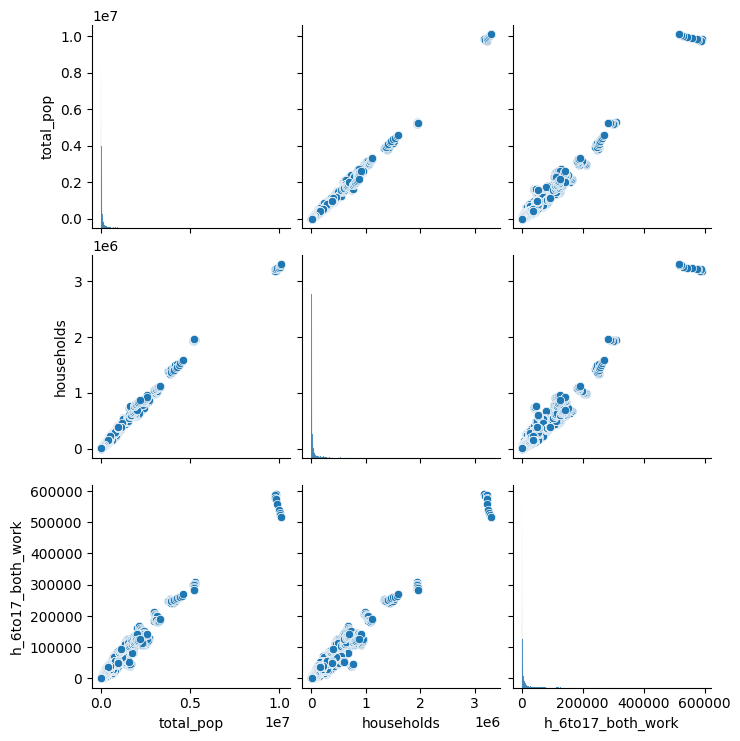

In [17]:
# Seaborn visualization library
plt.figure()

sns.pairplot(childcare_costs[['total_pop', 'households', 'h_6to17_both_work']])

plt.show()

EXPLANATION NEEDED (WILL DO THAT AS SOON AS I CAN)

2.4: Range-normalized numerical attributes WITH the greatest sample covariance?
What is their sample covariance? Create a scatter plot of these range-normalized
attributes.

In [18]:
from sklearn import preprocessing

In [19]:
range_normalizer = preprocessing.MinMaxScaler()
range_normalized_D = range_normalizer.fit_transform(childcare_costs)  #this carries out a range normalization on the attributtes

In [20]:
range_normalized_D

array([[0.15009693, 0.11532427, 0.15903372, ..., 0.18146877, 0.24628571,
        0.06122142],
       [0.16422044, 0.14958159, 0.15374937, ..., 0.19245024, 0.25097143,
        0.07806859],
       [0.17197452, 0.145659  , 0.17060896, ..., 0.17995882, 0.2432    ,
        0.06212395],
       ...,
       [0.09997231, 0.12212343, 0.07020634, ..., 0.23143445, 0.28057143,
        0.10108303],
       [0.06203268, 0.06903766, 0.04906895, ..., 0.26424159, 0.34582857,
        0.06362816],
       [0.09803379, 0.07479079, 0.1016608 , ..., 0.22910089, 0.292     ,
        0.07190132]])

In [21]:
range_normalized_D.shape  #this returns the shape of the range normalized attribute

(34567, 49)

In [22]:
cov_matrix_R = np.cov(range_normalized_D, rowvar=False) #this is the covariance matrix for range-normalized attributes
cov_matrix_R

array([[0.00960312, 0.00825056, 0.00942193, ..., 0.00118911, 0.00148514,
        0.00095527],
       [0.00825056, 0.00868357, 0.00680656, ..., 0.00126767, 0.00142371,
        0.00100404],
       [0.00942193, 0.00680656, 0.01032293, ..., 0.00096349, 0.00134228,
        0.00078828],
       ...,
       [0.00118911, 0.00126767, 0.00096349, ..., 0.00663748, 0.00714871,
        0.00469364],
       [0.00148514, 0.00142371, 0.00134228, ..., 0.00714871, 0.00826941,
        0.00429335],
       [0.00095527, 0.00100404, 0.00078828, ..., 0.00469364, 0.00429335,
        0.004584  ]])

In [23]:
cov_matrix_R.shape  #returns the shape of the covariace matrix for the range normalized attribute

(49, 49)

In [24]:
np.fill_diagonal(cov_matrix_R, 0)  #this fills the diagonal with zero. We do this in order to avoid having out algoritym return variance as the greatest covariance in the covariance matrix

In [25]:
cov_matrix_R

array([[0.        , 0.00825056, 0.00942193, ..., 0.00118911, 0.00148514,
        0.00095527],
       [0.00825056, 0.        , 0.00680656, ..., 0.00126767, 0.00142371,
        0.00100404],
       [0.00942193, 0.00680656, 0.        , ..., 0.00096349, 0.00134228,
        0.00078828],
       ...,
       [0.00118911, 0.00126767, 0.00096349, ..., 0.        , 0.00714871,
        0.00469364],
       [0.00148514, 0.00142371, 0.00134228, ..., 0.00714871, 0.        ,
        0.00429335],
       [0.00095527, 0.00100404, 0.00078828, ..., 0.00469364, 0.00429335,
        0.        ]])

In [26]:
rna = pd.DataFrame(cov_matrix_R, childcare_costs.columns, childcare_costs.columns)  #this coverts the covariance matrix to a dataframe, td
rna

,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,flfpr_20to64_6to17,flfpr_20to64_under6_6to17,...,femp_service,emp_sales,memp_sales,femp_sales,emp_n,memp_n,femp_n,emp_p,memp_p,femp_p
unr_16,0.000000,0.008251,0.009422,0.009807,0.006744,0.007933,-0.004645,-0.001252,-0.002248,-0.000795,...,0.000760,0.000748,0.000484,0.000214,-0.000530,-0.000202,-0.000390,0.001189,0.001485,0.000955
funr_16,0.008251,0.000000,0.006807,0.008370,0.007074,0.005688,-0.004234,-0.001236,-0.002124,-0.000809,...,0.000468,0.000561,0.000394,0.000247,-0.000189,-0.000029,-0.000196,0.001268,0.001424,0.001004
munr_16,0.009422,0.006807,0.000000,0.009666,0.005584,0.008726,-0.004339,-0.001068,-0.002041,-0.000653,...,0.000908,0.000806,0.000493,0.000154,-0.000766,-0.000338,-0.000494,0.000963,0.001342,0.000788
unr_20to64,0.009807,0.008370,0.009666,0.000000,0.007069,0.008385,-0.004841,-0.001280,-0.002392,-0.000916,...,0.000824,0.000629,0.000367,0.000150,-0.000475,-0.000131,-0.000365,0.001221,0.001533,0.000965
funr_20to64,0.006744,0.007074,0.005584,0.007069,0.000000,0.004695,-0.003491,-0.000978,-0.001813,-0.000706,...,0.000407,0.000367,0.000221,0.000162,-0.000103,0.000040,-0.000136,0.001079,0.001216,0.000840
munr_20to64,0.007933,0.005688,0.008726,0.008385,0.004695,0.000000,-0.003754,-0.000919,-0.001780,-0.000650,...,0.000809,0.000570,0.000323,0.000068,-0.000599,-0.000238,-0.000390,0.000792,0.001116,0.000639
flfpr_20to64,-0.004645,-0.004234,-0.004339,-0.004841,-0.003491,-0.003754,0.000000,0.007262,0.006192,0.005817,...,-0.001474,0.000716,0.001544,-0.000373,-0.002573,-0.003156,-0.000133,-0.001637,-0.002003,-0.000512
flfpr_20to64_under6,-0.001252,-0.001236,-0.001068,-0.001280,-0.000978,-0.000919,0.007262,0.000000,0.003478,0.005732,...,-0.000619,0.000515,0.000907,-0.000402,-0.002381,-0.002547,-0.000493,0.000193,0.000321,0.000510
flfpr_20to64_6to17,-0.002248,-0.002124,-0.002041,-0.002392,-0.001813,-0.001780,0.006192,0.003478,0.000000,0.003240,...,-0.000455,0.000328,0.000580,-0.000157,-0.001212,-0.001358,-0.000232,-0.000470,-0.000550,-0.000081
flfpr_20to64_under6_6to17,-0.000795,-0.000809,-0.000653,-0.000916,-0.000706,-0.000650,0.005817,0.005732,0.003240,0.000000,...,-0.000268,0.000692,0.000953,-0.000227,-0.001905,-0.001908,-0.000581,0.000052,0.000166,0.000378


In [27]:
stacked_cov = rna.stack()

In [28]:
highest_cov_RN = stacked_cov.nlargest(10) #this shows the first 10 pair of attributes with highest covariance. 
highest_cov_RN

pr_f        pr_p          0.012244
pr_p        pr_f          0.012244
unr_16      unr_20to64    0.009807
unr_20to64  unr_16        0.009807
munr_16     unr_20to64    0.009666
unr_20to64  munr_16       0.009666
unr_16      munr_16       0.009422
munr_16     unr_16        0.009422
pr_p        one_race_b    0.008776
one_race_b  pr_p          0.008776
dtype: float64

The range-normalized attributes with greatest sample covariance are pr_f and pr_p.

Their sample covariance is 0.012244. This is seen in the result displayed above

In [29]:
pr_f_index = childcare_costs.columns.get_loc('pr_f')  #This return  the column(or index) number of pr_f
pr_f_index

11

In [30]:
pr_p_index = childcare_costs.columns.get_loc('pr_p') #This return  the column(or index) number of pr_p
pr_p_index

12

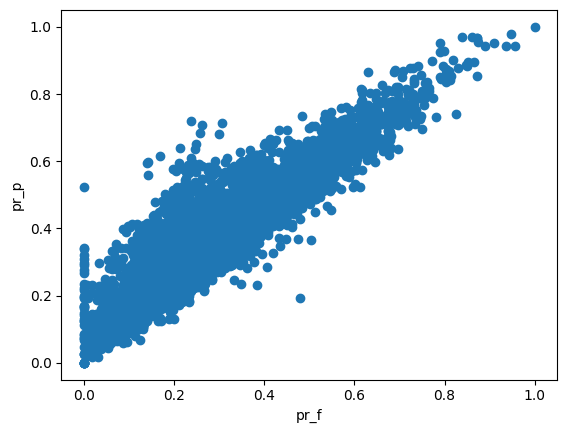

In [31]:
plt.scatter(range_normalized_D[:, pr_f_index ], range_normalized_D[:, pr_p_index])
plt.xlabel('pr_f')
plt.ylabel('pr_p')
plt.show()

2.5: Which Z-score-normalized numerical attributes have the greatest correlation? What is
their correlation? Create a scatter plot of these Z-score-normalized attributes.

In [32]:
standard_scaler = preprocessing.StandardScaler()
standard_normalized_D = standard_scaler.fit_transform(childcare_costs)  
#The section of the code produces Z-score-normalized numerical attributes

In [33]:
standard_normalized_D

array([[-0.57817235, -0.73498426, -0.38148688, ..., -0.47680459,
        -0.23957314, -0.79191742],
       [-0.43404623, -0.36735456, -0.43349799, ..., -0.34201224,
        -0.18804496, -0.54308264],
       [-0.35491816, -0.40944957, -0.26755779, ..., -0.49533854,
        -0.27350633, -0.77858699],
       ...,
       [-1.08967877, -0.66201959, -1.25576886, ...,  0.1365006 ,
         0.13746231, -0.20315656],
       [-1.4768411 , -1.23170531, -1.4638133 , ...,  0.53919275,
         0.85508645, -0.75636959],
       [-1.10946079, -1.16996597, -0.94617893, ...,  0.10785723,
         0.26314079, -0.63417395]])

In [34]:
standard_normalized_D.shape

(34567, 49)

In [35]:
correlation_matrix = np.corrcoef(standard_normalized_D, rowvar=False)
correlation_matrix

array([[1.        , 0.90349981, 0.94630647, ..., 0.14894107, 0.16665682,
        0.14397828],
       [0.90349981, 1.        , 0.71891357, ..., 0.16697633, 0.16801048,
        0.15914075],
       [0.94630647, 0.71891357, 1.        , ..., 0.11639707, 0.14527998,
        0.11459259],
       ...,
       [0.14894107, 0.16697633, 0.11639707, ..., 1.        , 0.96491432,
        0.85091573],
       [0.16665682, 0.16801048, 0.14527998, ..., 0.96491432, 1.        ,
        0.69732684],
       [0.14397828, 0.15914075, 0.11459259, ..., 0.85091573, 0.69732684,
        1.        ]])

In [36]:
np.fill_diagonal(correlation_matrix, 0) #this allows me to exclude the diagonal elements with correlation of 1.

In [37]:
correlation_matrix

array([[0.        , 0.90349981, 0.94630647, ..., 0.14894107, 0.16665682,
        0.14397828],
       [0.90349981, 0.        , 0.71891357, ..., 0.16697633, 0.16801048,
        0.15914075],
       [0.94630647, 0.71891357, 0.        , ..., 0.11639707, 0.14527998,
        0.11459259],
       ...,
       [0.14894107, 0.16697633, 0.11639707, ..., 0.        , 0.96491432,
        0.85091573],
       [0.16665682, 0.16801048, 0.14527998, ..., 0.96491432, 0.        ,
        0.69732684],
       [0.14397828, 0.15914075, 0.11459259, ..., 0.85091573, 0.69732684,
        0.        ]])

In [39]:
rdc = pd.DataFrame(correlation_matrix, childcare_costs.columns, childcare_costs.columns)
rdc

,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,flfpr_20to64_6to17,flfpr_20to64_under6_6to17,...,femp_service,emp_sales,memp_sales,femp_sales,emp_n,memp_n,femp_n,emp_p,memp_p,femp_p
unr_16,0.000000,0.903500,0.946306,0.984472,0.880588,0.922992,-0.408970,-0.108674,-0.268916,-0.061081,...,0.103679,0.115523,0.064469,0.048765,-0.076284,-0.024469,-0.075770,0.148941,0.166657,0.143978
funr_16,0.903500,0.000000,0.718914,0.883573,0.971280,0.695896,-0.391967,-0.112844,-0.267187,-0.065378,...,0.067154,0.091199,0.055124,0.059176,-0.028598,-0.003729,-0.040020,0.166976,0.168010,0.159141
munr_16,0.946306,0.718914,0.000000,0.935876,0.703226,0.979187,-0.368443,-0.089423,-0.235466,-0.048404,...,0.119441,0.120180,0.063262,0.033881,-0.106247,-0.039511,-0.092708,0.116397,0.145280,0.114593
unr_20to64,0.984472,0.883573,0.935876,0.000000,0.889766,0.940366,-0.410862,-0.107104,-0.275909,-0.067848,...,0.108399,0.093755,0.047144,0.032931,-0.065810,-0.015340,-0.068510,0.147407,0.165855,0.140170
funr_20to64,0.880588,0.971280,0.703226,0.889766,0.000000,0.684927,-0.385347,-0.106422,-0.271932,-0.067995,...,0.069669,0.071136,0.036936,0.046280,-0.018490,0.005999,-0.033109,0.169460,0.171154,0.158714
munr_20to64,0.922992,0.695896,0.979187,0.940366,0.684927,0.000000,-0.369258,-0.089123,-0.237986,-0.055776,...,0.123353,0.098343,0.048041,0.017383,-0.096236,-0.032232,-0.084681,0.110796,0.139944,0.107534
flfpr_20to64,-0.408970,-0.391967,-0.368443,-0.410862,-0.385347,-0.369258,0.000000,0.532869,0.626226,0.377735,...,-0.170026,0.093480,0.173693,-0.071911,-0.312771,-0.323017,-0.021846,-0.173341,-0.189989,-0.065282
flfpr_20to64_under6,-0.108674,-0.112844,-0.089423,-0.107104,-0.106422,-0.089123,0.532869,0.000000,0.346759,0.366955,...,-0.070416,0.066368,0.100597,-0.076385,-0.285329,-0.256975,-0.079971,0.020104,0.030007,0.064020
flfpr_20to64_6to17,-0.268916,-0.267187,-0.235466,-0.275909,-0.271932,-0.237986,0.626226,0.346759,0.000000,0.285894,...,-0.071280,0.058181,0.088604,-0.040999,-0.200243,-0.188846,-0.051897,-0.067613,-0.070852,-0.014020
flfpr_20to64_under6_6to17,-0.061081,-0.065378,-0.048404,-0.067848,-0.067995,-0.055776,0.377735,0.366955,0.285894,0.000000,...,-0.026999,0.078846,0.093515,-0.038203,-0.202121,-0.170367,-0.083378,0.004791,0.013712,0.041976


In [40]:
stacked_corr_ma = rdc.stack()

In [41]:
highest_cov_pairs = stacked_corr_ma.nlargest(10)
highest_cov_pairs

total_pop           households            0.996081
households          total_pop             0.996081
h_under6_both_work  h_6to17_both_work     0.994075
h_6to17_both_work   h_under6_both_work    0.994075
h_under6_f_work     h_6to17_fwork         0.990488
h_6to17_fwork       h_under6_f_work       0.990488
total_pop           h_under6_both_work    0.987411
h_under6_both_work  total_pop             0.987411
households          h_under6_both_work    0.984651
h_under6_both_work  households            0.984651
dtype: float64

The two numerical attribute with the greatest correlation are total_pop and households. 
Their correlation is  0.996081 as displayed above

In [42]:
total_pop_index = childcare_costs.columns.get_loc('total_pop')
total_pop_index

17

In [43]:
households_index = childcare_costs.columns.get_loc('households')
households_index

27

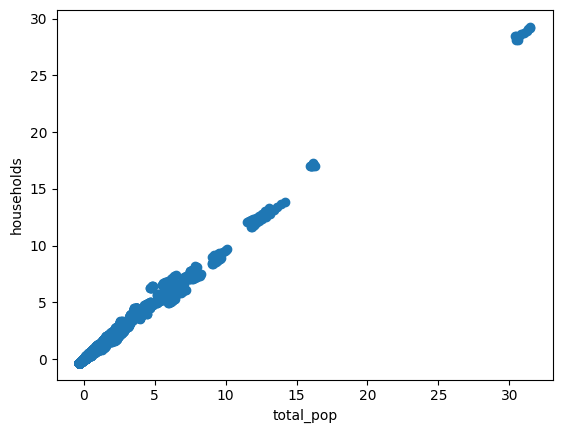

In [44]:
plt.scatter(standard_normalized_D[:, total_pop_index ], standard_normalized_D[:, households_index])
plt.xlabel('total_pop')
plt.ylabel('households')
plt.show()

2.6: How many pairs of features have correlation greater than or equal to 0.5?

In [45]:
correlation_matrix

array([[0.        , 0.90349981, 0.94630647, ..., 0.14894107, 0.16665682,
        0.14397828],
       [0.90349981, 0.        , 0.71891357, ..., 0.16697633, 0.16801048,
        0.15914075],
       [0.94630647, 0.71891357, 0.        , ..., 0.11639707, 0.14527998,
        0.11459259],
       ...,
       [0.14894107, 0.16697633, 0.11639707, ..., 0.        , 0.96491432,
        0.85091573],
       [0.16665682, 0.16801048, 0.14527998, ..., 0.96491432, 0.        ,
        0.69732684],
       [0.14397828, 0.15914075, 0.11459259, ..., 0.85091573, 0.69732684,
        0.        ]])

In [46]:
corr_dframe = pd.DataFrame(correlation_matrix, childcare_costs.columns, childcare_costs.columns) 
corr_dframe
#this is to transform the correlation_matrix to a data frame with attributes names

,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,flfpr_20to64_6to17,flfpr_20to64_under6_6to17,...,femp_service,emp_sales,memp_sales,femp_sales,emp_n,memp_n,femp_n,emp_p,memp_p,femp_p
unr_16,0.000000,0.903500,0.946306,0.984472,0.880588,0.922992,-0.408970,-0.108674,-0.268916,-0.061081,...,0.103679,0.115523,0.064469,0.048765,-0.076284,-0.024469,-0.075770,0.148941,0.166657,0.143978
funr_16,0.903500,0.000000,0.718914,0.883573,0.971280,0.695896,-0.391967,-0.112844,-0.267187,-0.065378,...,0.067154,0.091199,0.055124,0.059176,-0.028598,-0.003729,-0.040020,0.166976,0.168010,0.159141
munr_16,0.946306,0.718914,0.000000,0.935876,0.703226,0.979187,-0.368443,-0.089423,-0.235466,-0.048404,...,0.119441,0.120180,0.063262,0.033881,-0.106247,-0.039511,-0.092708,0.116397,0.145280,0.114593
unr_20to64,0.984472,0.883573,0.935876,0.000000,0.889766,0.940366,-0.410862,-0.107104,-0.275909,-0.067848,...,0.108399,0.093755,0.047144,0.032931,-0.065810,-0.015340,-0.068510,0.147407,0.165855,0.140170
funr_20to64,0.880588,0.971280,0.703226,0.889766,0.000000,0.684927,-0.385347,-0.106422,-0.271932,-0.067995,...,0.069669,0.071136,0.036936,0.046280,-0.018490,0.005999,-0.033109,0.169460,0.171154,0.158714
munr_20to64,0.922992,0.695896,0.979187,0.940366,0.684927,0.000000,-0.369258,-0.089123,-0.237986,-0.055776,...,0.123353,0.098343,0.048041,0.017383,-0.096236,-0.032232,-0.084681,0.110796,0.139944,0.107534
flfpr_20to64,-0.408970,-0.391967,-0.368443,-0.410862,-0.385347,-0.369258,0.000000,0.532869,0.626226,0.377735,...,-0.170026,0.093480,0.173693,-0.071911,-0.312771,-0.323017,-0.021846,-0.173341,-0.189989,-0.065282
flfpr_20to64_under6,-0.108674,-0.112844,-0.089423,-0.107104,-0.106422,-0.089123,0.532869,0.000000,0.346759,0.366955,...,-0.070416,0.066368,0.100597,-0.076385,-0.285329,-0.256975,-0.079971,0.020104,0.030007,0.064020
flfpr_20to64_6to17,-0.268916,-0.267187,-0.235466,-0.275909,-0.271932,-0.237986,0.626226,0.346759,0.000000,0.285894,...,-0.071280,0.058181,0.088604,-0.040999,-0.200243,-0.188846,-0.051897,-0.067613,-0.070852,-0.014020
flfpr_20to64_under6_6to17,-0.061081,-0.065378,-0.048404,-0.067848,-0.067995,-0.055776,0.377735,0.366955,0.285894,0.000000,...,-0.026999,0.078846,0.093515,-0.038203,-0.202121,-0.170367,-0.083378,0.004791,0.013712,0.041976


In [47]:
corr_dframe = corr_dframe.set_index(corr_dframe.columns)
pairs = corr_dframe.where(np.triu(corr_dframe, k=1).astype(bool)).stack()
lt = list(pairs[pairs.ge(0.5)].index)
lt

[('unr_16', 'funr_16'),
 ('unr_16', 'munr_16'),
 ('unr_16', 'unr_20to64'),
 ('unr_16', 'funr_20to64'),
 ('unr_16', 'munr_20to64'),
 ('unr_16', 'pr_f'),
 ('unr_16', 'pr_p'),
 ('funr_16', 'munr_16'),
 ('funr_16', 'unr_20to64'),
 ('funr_16', 'funr_20to64'),
 ('funr_16', 'munr_20to64'),
 ('funr_16', 'pr_f'),
 ('funr_16', 'pr_p'),
 ('munr_16', 'unr_20to64'),
 ('munr_16', 'funr_20to64'),
 ('munr_16', 'munr_20to64'),
 ('munr_16', 'pr_f'),
 ('munr_16', 'pr_p'),
 ('unr_20to64', 'funr_20to64'),
 ('unr_20to64', 'munr_20to64'),
 ('unr_20to64', 'pr_f'),
 ('unr_20to64', 'pr_p'),
 ('funr_20to64', 'munr_20to64'),
 ('funr_20to64', 'pr_f'),
 ('funr_20to64', 'pr_p'),
 ('munr_20to64', 'pr_f'),
 ('munr_20to64', 'pr_p'),
 ('flfpr_20to64', 'flfpr_20to64_under6'),
 ('flfpr_20to64', 'flfpr_20to64_6to17'),
 ('flfpr_20to64', 'mlfpr_20to64'),
 ('flfpr_20to64', 'mhi_2018'),
 ('mlfpr_20to64', 'mhi_2018'),
 ('pr_f', 'pr_p'),
 ('mhi_2018', 'me_2018'),
 ('mhi_2018', 'fme_2018'),
 ('mhi_2018', 'mme_2018'),
 ('mhi_2018'

In [48]:
len(lt)

83

There are 83 pairs of features with correlation greater than or equal to 0.5

2.7: How many pairs of features have negative sample covariance?

## Part 2.8 (Fatima)

## Part 2.9 (Qasim)

# Part 3: Write Functions For Clustering in Python

## Part 3.1: K-Means Algorithm (Ian)

### Preliminaries

I am using a small data set to test on. This data corresponds to soybean data.

In [7]:
df = pd.read_csv("soybean_data.csv", index_col=0)

### Create Distance Matrix Function

In [2]:
def distMatrix(df, centroids):
    df_mat, cent_mat = df.to_numpy(), centroids.to_numpy()
    return np.array([[np.linalg.norm(df_mat[i, :] - cent_mat[j, :]) for j in range(cent_mat.shape[0])] for i in range(df_mat.shape[0])])

### Assign New Clusters

In [4]:
def cluster(dm):
    def f(i):
        return reduce(lambda x, y: x if x[0] <= y[0] else y, zip(dm[i, :], range(len(dm[i, :]))))[1]
    return f

### Bringing It All Together

In [5]:
def kmeans(df, k, eps):
    @tail_recursive
    def go(currentClus, prevClus, r):
        print("Iteration Number {}".format(r))
        centroids = pd.DataFrame(df.to_dict(orient='series') | {"Cluster": currentClus}).groupby(by=["Cluster"]).mean()
        if prevClus is not None and ((currentClus != prevClus).sum() / len(currentClus)) < eps:
            return centroids
        else:
            dm = distMatrix(df, centroids)
            return go.tail_call(df.index.map(cluster(dm)), currentClus, r + 1)
    return go([randrange(k) for i in range(df.shape[0])], None, 0)

In [8]:
kmeans(df, 4, 0.001)

Iteration Number 0
Iteration Number 1
Iteration Number 2
Iteration Number 3
Iteration Number 4
Iteration Number 5


,Date,Plant-Stand,Precip,Temp,Hail,Crop-Hist,Area-Damaged,Severity,Seed-TMT,Germination,...,Int-Discolor,Sclerotia,Fruit-Pods,Fruit Spots,Seed,Mold-Growth,Seed-Discolor,Seed-Size,Shriveling,Roots
Cluster,,,,,,,,,,,,,,,,,,,,,
0,4.700000,0.000000,0.000000,1.600000,0.600000,1.600000,2.5,1.000000,0.500000,0.900000,...,2.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.800000,1.000000,1.800000,0.600000,0.300000,1.100000,1.2,1.500000,0.500000,0.300000,...,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,1.000000
2,4.500000,0.000000,2.000000,1.000000,0.100000,1.900000,0.3,1.300000,0.500000,1.300000,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,1.588235,0.882353,1.882353,0.235294,0.294118,2.058824,1.0,1.647059,0.470588,1.647059,...,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.470588


## Part 3.2

# Part 4: Analyze Your Data

## Part 4.1

## Part 4.2 (Qasim)

## Part 4.3

## Part 4.4